# 1) Importing the data

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date
import statistics as stats

In [2]:
# import data
dim_company_type = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_company_type.csv')
dim_educational_qualification = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_educational_qualification.csv')
dim_gender = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_gender.csv')
dim_industry = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_industry.csv')
dim_job_specialisation = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_job_specialisation.csv')
dim_nationality = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_nationality.csv')
dim_race = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_race.csv')
dim_source = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_source.csv')
dim_state = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_state.csv')
dim_working_arrangement = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\dim_working_arrangement.csv')
fact_job_details = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\fact_job_details.csv')
fact_submissions = pd.read_csv(r'C:\Users\Dante\Desktop\MPG\CSV files\fact_submissions.csv')

## Merge fact_submissions

In [3]:
fact_submissions.head()

,submission_id,created_at,source_key,educational_qualification_key,gender_key,nationality_key,race_key,age,advice
0,1,2022-03-10 12:51:52,1,8,2,1,1,27.0,NaN
1,2,2022-03-10 12:51:57,1,5,2,1,1,23.0,NaN
2,3,2022-03-10 12:52:04,1,6,1,1,1,29.0,NaN
3,4,2022-03-10 12:52:10,1,5,2,1,1,27.0,NaN
4,5,2022-03-10 12:52:21,1,5,2,1,1,26.0,NaN


In [4]:
# join educational_qualification
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_educational_qualification,
                            how = 'left',
                           on = 'educational_qualification_key')
fact_submissions.drop(columns = ['educational_qualification_key', 'educational_qualification_bm'], inplace = True)

# join gender
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_gender,
                            how = 'left',
                            on = 'gender_key')
fact_submissions.drop(columns = ['gender_key', 'gender_bm'], inplace = True)

# join nationality
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_nationality,
                            how = 'left',
                            on = 'nationality_key')
fact_submissions.drop(columns = ['nationality_key', 'nationality_bm', 'code_alpha2', 'code_alpha3', 'region'], inplace = True)

# join race
fact_submissions = pd.merge(left = fact_submissions,
                            right = dim_race,
                            how = 'left',
                            on = 'race_key')
fact_submissions.drop(columns = ['race_key', 'race_bm'], inplace = True)

In [5]:
fact_submissions.head()

,submission_id,created_at,source_key,age,advice,educational_qualification_en,gender_en,nationality_en,race_en
0,1,2022-03-10 12:51:52,1,27.0,NaN,Master's Degree (Overseas),Male,Malaysia,Chinese
1,2,2022-03-10 12:51:57,1,23.0,NaN,Bachelor's Degree (Local),Male,Malaysia,Chinese
2,3,2022-03-10 12:52:04,1,29.0,NaN,Bachelor's Degree (Overseas),Female,Malaysia,Chinese
3,4,2022-03-10 12:52:10,1,27.0,NaN,Bachelor's Degree (Local),Male,Malaysia,Chinese
4,5,2022-03-10 12:52:21,1,26.0,NaN,Bachelor's Degree (Local),Male,Malaysia,Chinese


## Merge fact_job_details

In [6]:
fact_job_details.head()

,job_id,submission_id,total_experience_months,industry_key,job_specialisation_key,job_title,company_type_key,gross_salary_myr,working_arrangement_key,located_in_malaysia,state_key,avg_working_hours_per_day,avg_working_days_per_week,salary_compensation_satisfaction_score,job_satisfaction_score,thoughts_comments
0,1,1,24,23.0,20.0,Data Analyst,3,6700.0,2,True,1,8.0,5.0,4,3,NaN
1,2,2,12,23.0,48.0,IT specialist,3,5850.0,1,True,1,10.0,5.0,4,2,High salary but have to deal with very toxic m...
2,3,3,72,NaN,68.0,Product specialist,3,7500.0,1,True,1,9.0,5.0,4,4,NaN
3,4,4,36,23.0,20.0,Senior executive - Data Analytics,3,3800.0,2,True,15,8.0,5.0,4,3,NaN
4,5,5,48,17.0,69.0,Demand Planner,3,12000.0,1,True,4,8.0,5.0,3,3,NaN


In [7]:
# join industry
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_industry,
                            how = 'left',
                           on = 'industry_key')
fact_job_details.drop(columns = ['industry_key', 'industry_bm', 'industry_sub_definitions'], inplace = True)

# join job_specialisation
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_job_specialisation,
                            how = 'left',
                           on = 'job_specialisation_key')
fact_job_details.drop(columns = ['job_specialisation_key', 'job_specialisation_bm', 'job_specialisation_sub_definitions'], inplace = True)

# join company_type
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_company_type,
                            how = 'left',
                            on = 'company_type_key')
fact_job_details.drop(columns = ['company_type_key', 'company_type_bm'], inplace = True)

# join working_arrangement
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_working_arrangement,
                            how = 'left',
                            on = 'working_arrangement_key')
fact_job_details.drop(columns = ['working_arrangement_key', 'working_arrangement_bm'], inplace = True)

# join state
fact_job_details = pd.merge(left = fact_job_details,
                            right = dim_state,
                            how = 'left',
                            on = 'state_key')
fact_job_details.drop(columns = ['state_key', 'state_bm'], inplace = True)

In [8]:
fact_job_details.head()

,job_id,submission_id,total_experience_months,job_title,gross_salary_myr,located_in_malaysia,avg_working_hours_per_day,avg_working_days_per_week,salary_compensation_satisfaction_score,job_satisfaction_score,thoughts_comments,industry_en,job_specialisation_en,company_type_en,working_arrangement_en,state_en
0,1,1,24,Data Analyst,6700.0,True,8.0,5.0,4,3,NaN,Financial services / Investment / Banking / In...,"Data Scientists, Data Analytics, Data Engineer...",Multinational Corporation,Fully Working from Office,Federal Territory of Kuala Lumpur
1,2,2,12,IT specialist,5850.0,True,10.0,5.0,4,2,High salary but have to deal with very toxic m...,Financial services / Investment / Banking / In...,"IT - Software and Web Developers, Programmers,...",Multinational Corporation,Fully Working from Home,Federal Territory of Kuala Lumpur
2,3,3,72,Product specialist,7500.0,True,9.0,5.0,4,4,NaN,NaN,Project and Product Management,Multinational Corporation,Fully Working from Home,Federal Territory of Kuala Lumpur
3,4,4,36,Senior executive - Data Analytics,3800.0,True,8.0,5.0,4,3,NaN,Financial services / Investment / Banking / In...,"Data Scientists, Data Analytics, Data Engineer...",Multinational Corporation,Fully Working from Office,Selangor
4,5,5,48,Demand Planner,12000.0,True,8.0,5.0,3,3,NaN,Electronics,"Purchasing, Procurement, Demand / Supply Plann...",Multinational Corporation,Fully Working from Home,Johor


# 2) Analysis

## Benford's Law

In [9]:
# get first, second number of salary amounts
df_salary_int = pd.DataFrame()
df_salary_int['salary'] = fact_job_details['gross_salary_myr'].astype({'gross_salary_myr': 'int64'})
df_salary_int['first_digit'] = df_salary_int['salary'].astype(str).str[:1]
df_salary_int['second_digit'] = df_salary_int['salary'].astype(str).str[1:2]
df_salary_int

,salary,first_digit,second_digit
0,6700,6,7
1,5850,5,8
2,7500,7,5
3,3800,3,8
4,12000,1,2
...,...,...,...
4569,8400,8,4
4570,2800,2,8
4571,14000,1,4
4572,3800,3,8


<AxesSubplot:xlabel='count', ylabel='first_digit'>

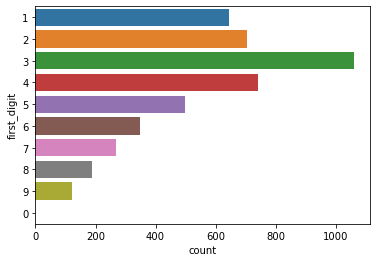

In [10]:
# histogram for first digit
sns.countplot(data = df_salary_int,
              y = 'first_digit',
             order = ['1','2','3','4','5','6','7','8','9','0'])

In [11]:
df_first_digit_counts = pd.DataFrame()
df_first_digit_counts = df_salary_int.groupby(['first_digit']).size().to_frame('count')
df_first_digit_counts['percentage'] = 100 * (df_first_digit_counts['count']/len(df_salary_int))
df_first_digit_counts

,count,percentage
first_digit,,
1,643,14.057718
2,705,15.413205
3,1062,23.218190
4,741,16.200262
5,498,10.887626
6,348,7.608220
7,268,5.859204
8,188,4.110188
9,121,2.645387


<AxesSubplot:xlabel='count', ylabel='second_digit'>

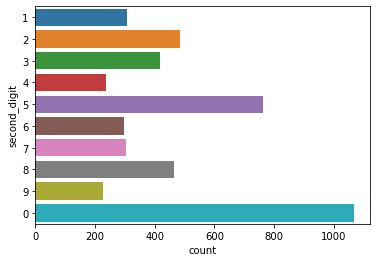

In [12]:
# histogram for second digit
sns.countplot(data = df_salary_int,
              y = 'second_digit',
             order = ['1','2','3','4','5','6','7','8','9','0'])

In [13]:
df_second_digit_counts = pd.DataFrame()
df_second_digit_counts = df_salary_int.groupby(['second_digit']).size().to_frame('count')
df_second_digit_counts['percentage'] = 100 * (df_second_digit_counts['count']/len(df_salary_int))
df_second_digit_counts

,count,percentage
second_digit,,
,9,0.196764
0,1069,23.371229
1,307,6.711850
2,483,10.559685
3,416,9.094884
4,238,5.203323
5,763,16.681242
6,297,6.493223
7,304,6.646261


## Submissions over time

In [14]:
fact_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 4573
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4574 non-null   int64  
 1   created_at                    4574 non-null   object 
 2   source_key                    4574 non-null   int64  
 3   age                           4558 non-null   float64
 4   advice                        0 non-null      float64
 5   educational_qualification_en  4574 non-null   object 
 6   gender_en                     4574 non-null   object 
 7   nationality_en                4574 non-null   object 
 8   race_en                       4574 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 357.3+ KB


In [15]:
# make datetime type
fact_submissions = fact_submissions.astype({'created_at': 'datetime64'})

# new columns for separate date and time
fact_submissions['date'] = fact_submissions['created_at'].dt.date
fact_submissions['time'] = fact_submissions['created_at'].dt.time
fact_submissions = fact_submissions.astype({'date': 'datetime64'})

In [16]:
fact_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 4573
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   submission_id                 4574 non-null   int64         
 1   created_at                    4574 non-null   datetime64[ns]
 2   source_key                    4574 non-null   int64         
 3   age                           4558 non-null   float64       
 4   advice                        0 non-null      float64       
 5   educational_qualification_en  4574 non-null   object        
 6   gender_en                     4574 non-null   object        
 7   nationality_en                4574 non-null   object        
 8   race_en                       4574 non-null   object        
 9   date                          4574 non-null   datetime64[ns]
 10  time                          4574 non-null   object        
dtypes: datetime64[ns](2), float64(

In [17]:
fact_submissions['date'].head()

0   2022-03-10
1   2022-03-10
2   2022-03-10
3   2022-03-10
4   2022-03-10
Name: date, dtype: datetime64[ns]

In [18]:
fact_submissions['time'].head()

0    12:51:52
1    12:51:57
2    12:52:04
3    12:52:10
4    12:52:21
Name: time, dtype: object

In [19]:
# generate series from 1st of launch month to today
min_date = np.min(fact_submissions['date'])
dates = pd.date_range(start = min_date, end = date.today(), freq='D')
df_dates = pd.Series(dates).to_frame()
df_dates.columns = ['date']

In [20]:
df_dates.head()

,date
0,2022-03-10
1,2022-03-11
2,2022-03-12
3,2022-03-13
4,2022-03-14


In [21]:
fact_submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 4573
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   submission_id                 4574 non-null   int64         
 1   created_at                    4574 non-null   datetime64[ns]
 2   source_key                    4574 non-null   int64         
 3   age                           4558 non-null   float64       
 4   advice                        0 non-null      float64       
 5   educational_qualification_en  4574 non-null   object        
 6   gender_en                     4574 non-null   object        
 7   nationality_en                4574 non-null   object        
 8   race_en                       4574 non-null   object        
 9   date                          4574 non-null   datetime64[ns]
 10  time                          4574 non-null   object        
dtypes: datetime64[ns](2), float64(

In [22]:
# get submission count for each day
df_submissions_per_day = fact_submissions.groupby('date').size().to_frame('count')
df_submissions_per_day.reset_index(inplace = True)

In [23]:
df_submissions_per_day = df_submissions_per_day.astype({'date': 'datetime64'})

In [24]:
# add col for cumulative submission count
df_submissions_per_day['cumulative_count'] = df_submissions_per_day['count'].cumsum()

In [25]:
df_submissions_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              81 non-null     datetime64[ns]
 1   count             81 non-null     int64         
 2   cumulative_count  81 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.0 KB


In [26]:
# merge
df_submissions_per_day = pd.merge(left = df_dates,
                                  right = df_submissions_per_day,
                                  how = 'left',
                                  on = 'date')

In [27]:
# add days since launch column
df_submissions_per_day['days_since_launch'] = df_submissions_per_day['date'] - min_date

# change to int
df_submissions_per_day['days_since_launch'] = df_submissions_per_day['days_since_launch'].dt.days

In [28]:
# fill down
df_submissions_per_day['cumulative_count'].ffill(axis = 0, inplace = True)

# fillna
df_submissions_per_day['cumulative_count'].fillna(value = 0, inplace = True)

In [29]:
df_submissions_per_day

,date,count,cumulative_count,days_since_launch
0,2022-03-10,2278.0,2278.0,0
1,2022-03-11,396.0,2674.0,1
2,2022-03-12,86.0,2760.0,2
3,2022-03-13,40.0,2800.0,3
4,2022-03-14,205.0,3005.0,4
...,...,...,...,...
82,2022-05-31,8.0,4555.0,82
83,2022-06-01,6.0,4561.0,83
84,2022-06-02,9.0,4570.0,84
85,2022-06-03,4.0,4574.0,85


In [30]:
df_submissions_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               87 non-null     datetime64[ns]
 1   count              81 non-null     float64       
 2   cumulative_count   87 non-null     float64       
 3   days_since_launch  87 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.4 KB


<AxesSubplot:xlabel='date', ylabel='cumulative_count'>

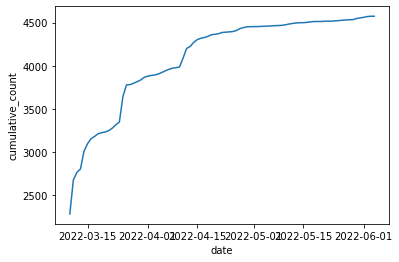

In [31]:
# timeline of submissions
sns.lineplot(data = df_submissions_per_day,
             x = 'date',
             y = 'cumulative_count',
             palette = 'pastel')

<AxesSubplot:xlabel='days_since_launch', ylabel='cumulative_count'>

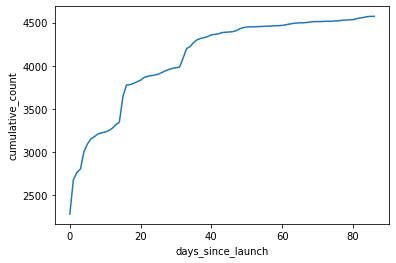

In [32]:
# timeline of submissions days since launch
sns.lineplot(data = df_submissions_per_day,
             x = 'days_since_launch',
             y = 'cumulative_count',
             palette = 'pastel')

## Submissions per time of day

In [33]:
# change data type to string
fact_submissions = fact_submissions.astype({'time': 'string'})
fact_submissions['time'].head()

0    12:51:52
1    12:51:57
2    12:52:04
3    12:52:10
4    12:52:21
Name: time, dtype: string

In [34]:
len(fact_submissions['time'].unique())

4367

In [35]:
# new time column without seconds
fact_submissions['rounded_time'] = fact_submissions['time'].str[:2]
fact_submissions['rounded_time'].head()

0    12
1    12
2    12
3    12
4    12
Name: rounded_time, dtype: string

In [36]:
len(fact_submissions['rounded_time'].unique())

24

In [37]:
# get submission count for hour:min time
df_submissions_per_time = fact_submissions.groupby('rounded_time').size().to_frame('count')
df_submissions_per_time.reset_index(inplace = True)

In [38]:
df_submissions_per_time.head()

,rounded_time,count
0,00,141
1,01,70
2,02,42
3,03,25
4,04,13


<AxesSubplot:xlabel='count', ylabel='rounded_time'>

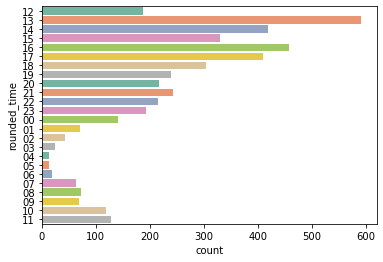

In [39]:
sns.countplot(data = fact_submissions,
              y = 'rounded_time',
              palette = 'Set2')

## Submission demographics

<AxesSubplot:xlabel='gender_en', ylabel='count'>

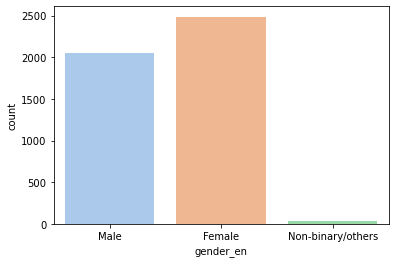

In [40]:
# gender breakdown
sns.countplot(data = fact_submissions,
              x = 'gender_en',
              palette = 'pastel')

<AxesSubplot:xlabel='count', ylabel='educational_qualification_en'>

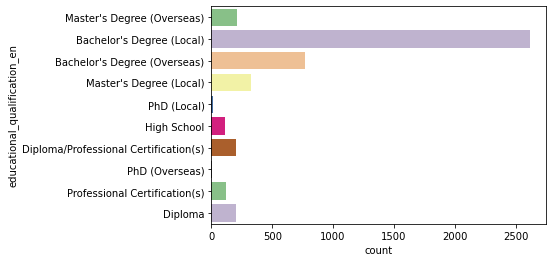

In [41]:
# educational qualification breakdown
sns.countplot(data = fact_submissions,
              y = 'educational_qualification_en',
              palette = 'Accent')

<AxesSubplot:xlabel='count', ylabel='race_en'>

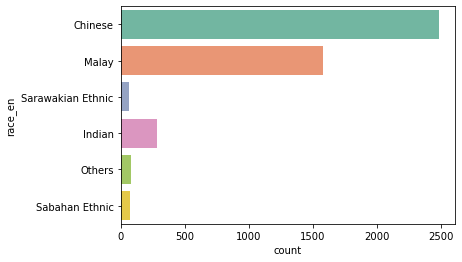

In [42]:
# race breakdown
sns.countplot(data = fact_submissions,
              y = 'race_en',
              palette = 'Set2')

In [43]:
race_gender_breakdown = fact_submissions.groupby(['race_en', 'gender_en']).size().to_frame('count')
race_gender_breakdown.reset_index(inplace = True)

In [44]:
race_gender_breakdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   race_en    18 non-null     object
 1   gender_en  18 non-null     object
 2   count      18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


In [45]:
race_gender_breakdown = race_gender_breakdown.pivot(index = 'gender_en', columns = 'race_en', values = 'count')
race_gender_breakdown

race_en,Chinese,Indian,Malay,Others,Sabahan Ethnic,Sarawakian Ethnic
gender_en,,,,,,
Female,1303,138,923,41,44,38
Male,1171,144,654,34,27,25
Non-binary/others,17,2,8,3,1,1


<AxesSubplot:xlabel='count', ylabel='race_en'>

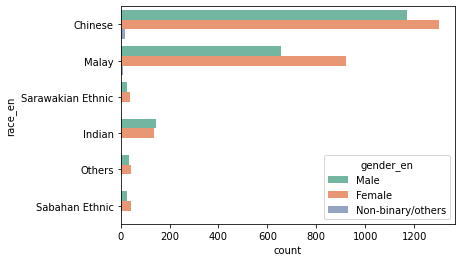

In [46]:
# race gender breakdown
sns.countplot(data = fact_submissions,
              y = 'race_en',
              hue = 'gender_en',
              palette = 'Set2')

In [47]:
# edu race breakdown
edu_race_breakdown = fact_submissions.groupby(['race_en', 'educational_qualification_en']).size().to_frame('count')
edu_race_breakdown.reset_index(inplace = True)
edu_race_breakdown = edu_race_breakdown.pivot(index = 'educational_qualification_en', columns = 'race_en', values = 'count')
edu_race_breakdown

race_en,Chinese,Indian,Malay,Others,Sabahan Ethnic,Sarawakian Ethnic
educational_qualification_en,,,,,,
Bachelor's Degree (Local),1391.0,150.0,971.0,34.0,43.0,33.0
Bachelor's Degree (Overseas),470.0,41.0,217.0,20.0,10.0,7.0
Diploma,111.0,18.0,60.0,6.0,3.0,7.0
Diploma/Professional Certification(s),105.0,13.0,70.0,6.0,5.0,2.0
High School,62.0,11.0,26.0,5.0,3.0,1.0
Master's Degree (Local),150.0,36.0,127.0,3.0,3.0,7.0
Master's Degree (Overseas),126.0,6.0,68.0,2.0,1.0,4.0
PhD (Local),9.0,1.0,3.0,NaN,NaN,NaN
PhD (Overseas),NaN,1.0,5.0,NaN,1.0,NaN


<AxesSubplot:xlabel='count', ylabel='educational_qualification_en'>

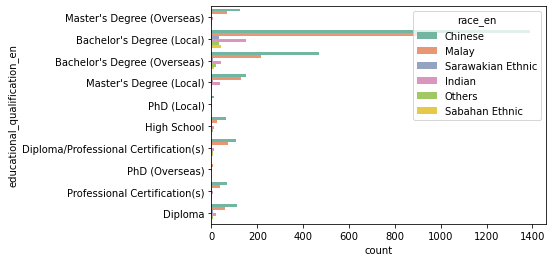

In [48]:
# edu race breakdown
sns.countplot(data = fact_submissions,
              y = 'educational_qualification_en',
              hue = 'race_en',
              palette = 'Set2')

In [49]:
# edu gender breakdown
edu_gender_breakdown = fact_submissions.groupby(['gender_en', 'educational_qualification_en']).size().to_frame('count')
edu_gender_breakdown.reset_index(inplace = True)
edu_gender_breakdown = edu_gender_breakdown.pivot(index = 'educational_qualification_en', columns = 'gender_en', values = 'count')
edu_gender_breakdown

gender_en,Female,Male,Non-binary/others
educational_qualification_en,,,
Bachelor's Degree (Local),1487.0,1118.0,17.0
Bachelor's Degree (Overseas),380.0,378.0,7.0
Diploma,105.0,99.0,1.0
Diploma/Professional Certification(s),109.0,91.0,1.0
High School,45.0,60.0,3.0
Master's Degree (Local),189.0,135.0,2.0
Master's Degree (Overseas),95.0,112.0,NaN
PhD (Local),5.0,8.0,NaN
PhD (Overseas),5.0,2.0,NaN


<AxesSubplot:xlabel='count', ylabel='educational_qualification_en'>

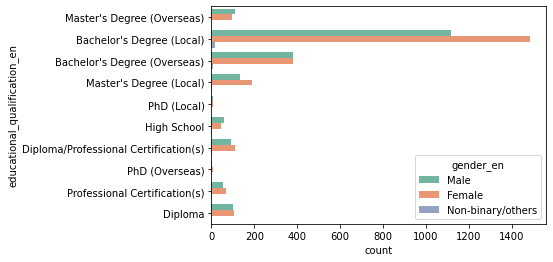

In [50]:
# edu gender breakdown
sns.countplot(data = fact_submissions,
              y = 'educational_qualification_en',
              hue = 'gender_en',
              palette = 'Set2')

## Statistics

In [51]:
fact_job_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 4573
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   job_id                                  4574 non-null   int64  
 1   submission_id                           4574 non-null   int64  
 2   total_experience_months                 4574 non-null   int64  
 3   job_title                               4574 non-null   object 
 4   gross_salary_myr                        4574 non-null   float64
 5   located_in_malaysia                     4574 non-null   bool   
 6   avg_working_hours_per_day               4574 non-null   float64
 7   avg_working_days_per_week               4574 non-null   float64
 8   salary_compensation_satisfaction_score  4574 non-null   int64  
 9   job_satisfaction_score                  4574 non-null   int64  
 10  thoughts_comments                       2300 non-null   obje

In [52]:
# function for summary statistics
def calculate_summary_statistics(df, col, col_print_flag):
    if col_print_flag == 1:
        print(col)
        
    print("    Min : {:.1f}".format(df[col].min()))
    print("    Max : {:.1f}".format(df[col].max()))
    print("    Mean : {:.1f}".format(df[col].mean()))
    print("    Median : {:.1f}".format(df[col].median()))
    print("    Standard Deviation : {:.1f}".format(stats.stdev(df[col])))

In [53]:
col_list = ['gross_salary_myr', 'total_experience_months', 'avg_working_hours_per_day', 'avg_working_days_per_week', 'salary_compensation_satisfaction_score', 'job_satisfaction_score']

for col in col_list:
    calculate_summary_statistics(fact_job_details, col, 1)

gross_salary_myr
    Min : 1.0
    Max : 300000.0
    Mean : 6518.1
    Median : 4500.0
    Standard Deviation : 9576.2
total_experience_months
    Min : 0.0
    Max : 936.0
    Mean : 56.6
    Median : 48.0
    Standard Deviation : 49.7
avg_working_hours_per_day
    Min : 1.0
    Max : 24.0
    Mean : 8.8
    Median : 8.0
    Standard Deviation : 1.6
avg_working_days_per_week
    Min : 2.0
    Max : 7.0
    Mean : 5.2
    Median : 5.0
    Standard Deviation : 0.5
salary_compensation_satisfaction_score
    Min : 1.0
    Max : 5.0
    Mean : 3.2
    Median : 3.0
    Standard Deviation : 1.1
job_satisfaction_score
    Min : 1.0
    Max : 5.0
    Mean : 3.4
    Median : 4.0
    Standard Deviation : 1.1


In [54]:
# company type difference
col_diff = 'company_type_en'
col_list = ['gross_salary_myr', 'total_experience_months', 'avg_working_hours_per_day', 'avg_working_days_per_week', 'salary_compensation_satisfaction_score', 'job_satisfaction_score']
for col in col_list:    
    list_company_type = list(fact_job_details[col_diff].unique())
    print(col)
    for company_type in list_company_type:
        fact_job_details_company_type = fact_job_details[fact_job_details[col_diff] == company_type]
        print(company_type)
        calculate_summary_statistics(fact_job_details_company_type, col, 0)
    print('')

gross_salary_myr
Multinational Corporation
    Min : 4.5
    Max : 220500.0
    Mean : 7200.1
    Median : 5200.0
    Standard Deviation : 7756.4
Small & Medium-sized Enterprise
    Min : 2.4
    Max : 300000.0
    Mean : 5175.9
    Median : 3540.0
    Standard Deviation : 13006.1
Public Sector
    Min : 1200.0
    Max : 50000.0
    Mean : 5361.0
    Median : 4200.0
    Standard Deviation : 4488.9
Start-up
    Min : 1000.0
    Max : 102000.0
    Mean : 8538.2
    Median : 5000.0
    Standard Deviation : 11511.1
Government-linked Companies
    Min : 1200.0
    Max : 128844.0
    Mean : 7487.4
    Median : 5200.0
    Standard Deviation : 9507.2
Non-profit
    Min : 1500.0
    Max : 22000.0
    Mean : 4784.7
    Median : 3650.0
    Standard Deviation : 3763.2
Freelance/Self-employed
    Min : 1.0
    Max : 170000.0
    Mean : 13503.2
    Median : 6200.0
    Standard Deviation : 24722.1
Private Large Enterprises (Local)
    Min : 3.2
    Max : 61000.0
    Mean : 5702.9
    Median : 4000.0


In [56]:
fact_job_details[fact_job_details['avg_working_hours_per_day'] == 24]

,job_id,submission_id,total_experience_months,job_title,gross_salary_myr,located_in_malaysia,avg_working_hours_per_day,avg_working_days_per_week,salary_compensation_satisfaction_score,job_satisfaction_score,thoughts_comments,industry_en,job_specialisation_en,company_type_en,working_arrangement_en,state_en
95,96,96,192,Slave at YouTube,20000.0,True,24.0,7.0,5,5,The start is hard,Media,Communication - Public Relations (PR) and Media,Freelance/Self-employed,Fully Working from Home,Federal Territory of Kuala Lumpur
1114,1115,1115,120,Senior Database Admin Engineer,9500.0,True,24.0,7.0,4,4,Submit on behalf husband,NaN,"IT - Database, Network and Systems Administrat...",Multinational Corporation,Hybrid,Selangor
1617,1618,1618,36,Petroleum surveyor,7500.0,True,24.0,4.0,4,4,NaN,Oil & Gas,"Consulting - Consultants, Analysts, Advisors, ...",Multinational Corporation,Fully Working from Office,Johor
3865,3866,3866,60,Executive Director,30000.0,True,24.0,7.0,3,3,basically im the boss. working 24/7/365,Financial services / Investment / Banking / In...,NaN,Small & Medium-sized Enterprise,Hybrid,Federal Territory of Kuala Lumpur
4533,4534,4534,48,Senior Online Customer Service (E-commerce),5000.0,True,24.0,5.0,3,3,NaN,NaN,NaN,Small & Medium-sized Enterprise,Fully Working from Office,Selangor


In [57]:
fact_job_details[fact_job_details['avg_working_days_per_week'] == 7]

,job_id,submission_id,total_experience_months,job_title,gross_salary_myr,located_in_malaysia,avg_working_hours_per_day,avg_working_days_per_week,salary_compensation_satisfaction_score,job_satisfaction_score,thoughts_comments,industry_en,job_specialisation_en,company_type_en,working_arrangement_en,state_en
54,55,55,36,Engineer,15000.0,True,12.0,7.0,2,2,NaN,Telecommunication Services,Customer Service and Customer / Community Rela...,Multinational Corporation,Fully Working from Office,Federal Territory of Kuala Lumpur
95,96,96,192,Slave at YouTube,20000.0,True,24.0,7.0,5,5,The start is hard,Media,Communication - Public Relations (PR) and Media,Freelance/Self-employed,Fully Working from Home,Federal Territory of Kuala Lumpur
111,112,112,48,Teacher,3000.0,True,11.0,7.0,2,2,NaN,Education,Teaching and Education,Small & Medium-sized Enterprise,Fully Working from Office,Selangor
227,228,228,36,Copywriter,4400.0,True,8.0,7.0,3,4,Coming from a law background to the creative i...,Advertising & Marketing,"Communication - Copywriters, Intepretors and T...",Small & Medium-sized Enterprise,Fully Working from Office,Federal Territory of Kuala Lumpur
293,294,294,24,"Senior Associate, Campaign Management",7200.0,True,12.0,7.0,4,2,NaN,E-commerce & Retail,Project and Product Management,Multinational Corporation,Hybrid,Federal Territory of Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,4504,4504,72,Media Officer,3700.0,True,9.0,7.0,3,4,I am a Team Media Officer who worked for 2 Mal...,NaN,NaN,Multinational Corporation,Fully Working from Office,Federal Territory of Kuala Lumpur
4519,4520,4520,12,Analyst,3200.0,True,8.0,7.0,4,3,"Now even private sector pay more, even freshgr...",NaN,NaN,Multinational Corporation,Hybrid,Johor
4529,4530,4530,5,Coding for Kids instructor,800.0,True,9.0,7.0,1,3,It's upsetting that I can't even earn 3K after...,NaN,NaN,Small & Medium-sized Enterprise,Fully Working from Home,Selangor
4544,4545,4545,108,Insurance Agent,25000.0,True,6.0,7.0,5,5,Hustle hard when young!,NaN,NaN,Multinational Corporation,Hybrid,Selangor
